# Photographic Arithmetic Solver using Neural Networks
## Onat Ayyildiz

GitHub link: https://github.com/OnatAyldz/cmse492_project.git

# Background and Motivation

There are some mobile phone or web applications that can solve mathematical equations from photos such as SymboLab or Photomath. Although these applications have good photographic detection, they were unable to solve any mathematical problems that could be useful in scopes beyond basic calculus and algebra. As a Physics major, I had always wanted a more intuitive version of Wolfram Alpha for example, that could tackles more mathematically challenging problems. So, my project goal was to begin the development of such an application.

The goal of the project is to use Machine Learning methods to solve mathematical equations provided in a photo. As aforementioned, this is already done by some applications, but I wanted to be able to create one that could solve more complex problems, using numerical methods if necessary to evaluate certain problems. This project tackles the first part of this goal, which is creating a machine learning algorithm that can deduce mathematical symbols from images and evaluate them computationally. Currently, it is only able to do arithmetic, although with slight modifications to how the equations are evaluated, more complex mathematical problems can be handled as well.

# Machine Learning Goal and Objective

There are two tasks to achieve in this project:
- symbol classification
- object detection

The symbol classification is a classification problem that I tried to tackle using SVMs, KNNs, Decision Trees and Random forests and ANNs. We need to be able to classify the different parts of an equation or math problem, to be able to put them into the mathematical equation solver in Python to be solved. Since this is a classification problem, we used the accuracy score (how many of the predicted were correctly classified) as a metric to evaluate its performance.

The object detection is a regression problem. We need to find the coordinates of the bounding boxes of each object in the image, which ends up being a regression problem to find coordinates in a given grid. Once the coordinates were obtained, the images were cropped and repadded to obtain individual images of the components, which would then be passed to the classifier to predict what they were. The different methods we used for this part of the project had different metrics for performance, which will be mentioned in the later sections

# Exploratory Data Analaysis

The dataset we had contained folders of images of various different handwritten mathematical numbers and symbols. This was very useful for our classification model, since the names of the folders served as class labels and the machine learning models we used could easily be trained for thsi format of the dataset. For the object detection part of the project, we had to make synthetic data using these individual pictures by combining random images and repadding them to obtain an image that looked like a handwritten equation.

In [ ]:
def equation_generator(numbers=2, max_num=100):
    assert numbers > 1, "You need at least two numbers to generate a valid equation"
    # Generate numbers and operator
    generated_eqn = []
    operators = ['+', '-', '*']
    for number in range(numbers):
        gen_num = np.random.randint(max_num)
        generated_eqn.append(str(gen_num))
        if number < numbers - 1:  # Add an operator only between numbers
            operator_ind = np.random.randint(len(operators))
            operator = operators[operator_ind]
            generated_eqn.append(operator)
    # Turn into string without calculating the result
    generated_eqn = ''.join(generated_eqn)
    return generated_eqn

def random_sample_file(directory):
    #  Randomly selects a file from a directory
    n=0
    random.seed();
    for root, dirs, files in os.walk(directory):
        for name in files:
            n += 1
            if random.uniform(0, n) < 1:
                rfile=os.path.join(root, name)
    return rfile
def generate_eqn_image(folder, eqn):
    eqn_array = []
    # 1. Pick correct file
    for char in eqn:
        if char == "*": char = 'times'
        char_folder = f"{folder}/{char}"
        file = random_sample_file(char_folder) # Randomly sample an image from the directory, each (45X45)
        img = io.imread(file)
        eqn_array.append(img)
    # 2. Concatenate all images together into 1 giant image
    eqn = np.hstack(eqn_array)
    return eqn

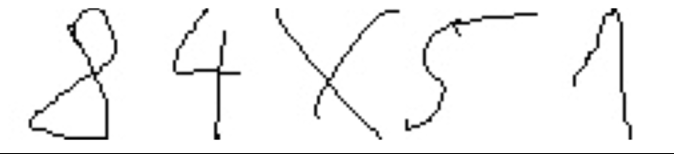

# Models and Training

For classification, we used a variety of different models.

## Support Vector Machines

Support Vector Machines (SVMs) are not well-suited for handling high-dimensional, unstructured image data due to several limitations. First, images must undergo preprocessing, such as dimensionality reduction, which can lead to a significant loss of spatial and contextual information. Additionally, SVMs must learn relationships between individual pixels, a process that is inherently inefficient for capturing the complex patterns present in image data. These challenges make SVMs a less optimal choice for image processing tasks compared to other approaches better equipped to manage the intricacies of such data.

## K-Nearest Neighbors

k-Nearest Neighbors (kNN) algorithms also face significant challenges when applied to high-dimensional data such as images. One major issue is the curse of dimensionality, where the distances between data points become increasingly similar, reducing the algorithm's ability to distinguish between them effectively. Additionally, variations in handwriting introduce noise, further complicating the task of defining clear decision boundaries. Training a kNN model on image data also demands substantial memory resources, unless heavy feature engineering is applied to reduce the data's complexity. These limitations make kNN less practical for handling image-based tasks.

## Decision Trees and Random Forests

Decision trees, while easy to interpret, are prone to overfitting the training data, making them less reliable for complex tasks. On the other hand, random forests address some of these issues by leveraging multiple decision trees to improve performance. This ensemble approach allows random forests to handle variations in handwriting, or noise, more effectively and to capture more information about the complex patterns present in image data. These features make random forests a more robust choice for tasks involving noisy and intricate datasets like images.

We trained our decision tree model using our scaled training data (X_train_scaled) and corresponding labels (y_train). During training, the decision tree splits the data at various feature thresholds to minimize classification error.
After training, predictions are made on the validation set (X_val_scaled) using the predict method, and accuracy is computed. 

For the training of our decision tree model, we create an ensemble of 100 decision trees on the training data with a random subset of features at each split. The number of splits and the number of decision trees were modified as hyperparameters to get the optimal results.

## Neural Networks

Convolutional Neural Networks (CNNs) excel at handling high-dimensional data, such as images, by capturing the spatial relationships between pixels, requiring less feature engineering than traditional methods. They are also more robust to noise and variations, thanks to techniques like weight sharing and pooling. The architecture of a CNN begins with normalizing grayscale image data to a range of [0,1]. Convolutional layers then detect features, with the first layer identifying basic elements like edges and corners, the second layer combining these into more complex patterns, and the third layer refining these patterns further. Max pooling layers reduce spatial dimensions, improving computational efficiency, while the network ultimately outputs probabilities for the different classes, enabling accurate classification.

To train our model, the data was preprocessed, creating grayscale images of uniform size (45x45 pixels) and splitting the dataset into training and validation subsets using the, with binarization applied to each image. The neural network is defined as a sequential model with an input layer, rescaling layer for normalization, three convolutional layers with ReLU activation followed by max-pooling for feature extraction, a flattening layer to convert 2D features into a 1D vector, and two dense layers, the final one outputting predictions for 14 classes. Training is performed on the processed dataset with categorical labels using stochastic gradient descent-based optimization. Metrics such as accuracy are evaluated on the validation dataset.

For our object detection task, a variety of different methods were used. 

## Custom Neural Networks

Designing a custom neural network architecture for tasks like object detection presents significant challenges, particularly when working with large images and creating regression models for bounding box coordinates. Additionally, many pre-trained neural networks, such as VGG19, are trained on datasets consisting of different types of images, which are often not numerical in nature. This discrepancy necessitates individual training to adapt these networks to specific tasks. Furthermore, these models are typically designed for classification tasks rather than object detection, which is inherently a regression problem, adding another layer of complexity to their adaptation.

## You Only Look Once (YOLO) Algorithm

The YOLO (You Only Look Once) algorithm divides an image into a grid, with each grid cell predicting whether an object is present within its boundaries and drawing a bounding box around it. It evaluates confidence scores for the presence of objects and their locations within these boxes. To handle overlapping predictions, YOLO ranks the confidence scores and eliminates lower-ranking overlapping boxes using techniques such as non-maximum suppression. Despite its efficiency in real-time object detection, training a YOLO model is extremely computationally expensive, requiring large datasets and significant processing power.

We tried to train the YOLO algorithm on a subset of our images to obtain the required weights the neural network, but this was computationally too expensive.

## OpenCV Contour Detection

OpenCV's contour detection requires a binarized image as input, where the algorithm identifies sharp changes in brightness or color to detect outlines. It traces the shapes within the image based on these color transitions, allowing for the identification of various forms, such as circles or squares, from the detected outlines. This method is effective for shape recognition in images where clear edges are present.

OpenCV is not explicitly a machine learning model, therefore it was not trained. It obtains contours of the object by calculating changes in the color of the image, by iteratively performing the same equation for each region of pixels on the images. Its performance however was evaluated using Intersection Over Union (IOU). Since we generated our equation images, we knew the bounding boxes of each number/symbol, so we could see how much of its area overlapped with the area of our OpenCV contour predictions, to see how accurate it was in predicting bounding boxes.

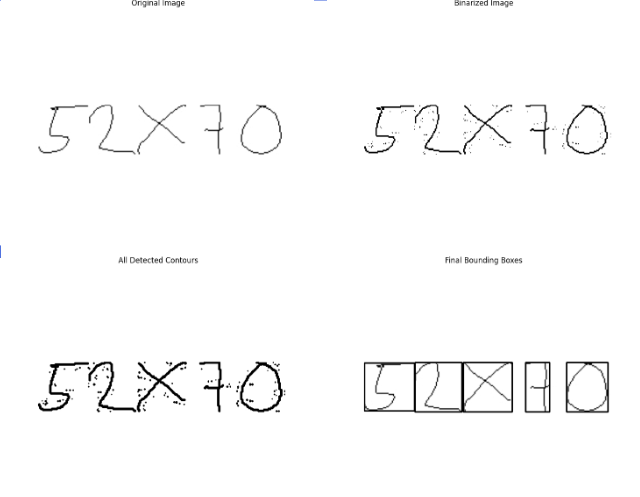

# Results and Model Comparison

## Classification Task

### Decision Tree

The decision trees had an overall accuracy score of classification of 0.7719

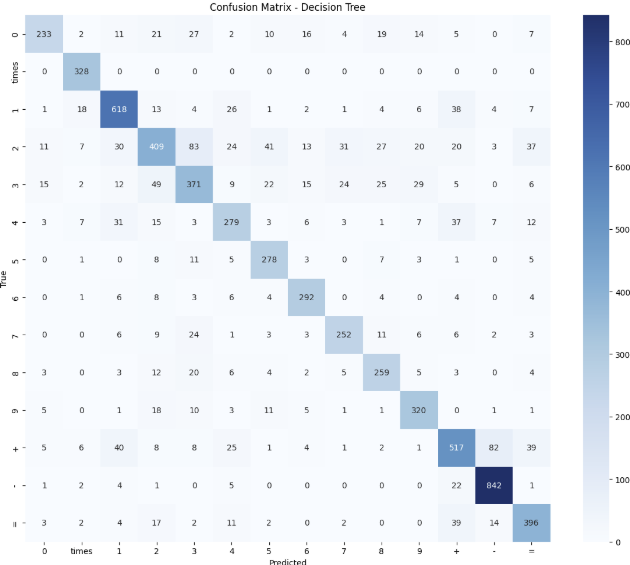

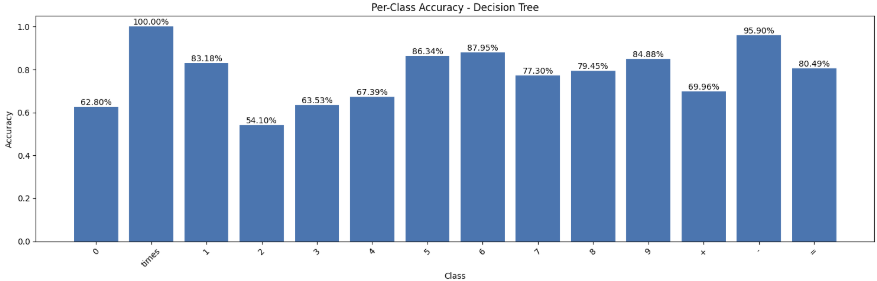

### Random Forests

The random forests had an overall accuracy score of classification of 0.8844

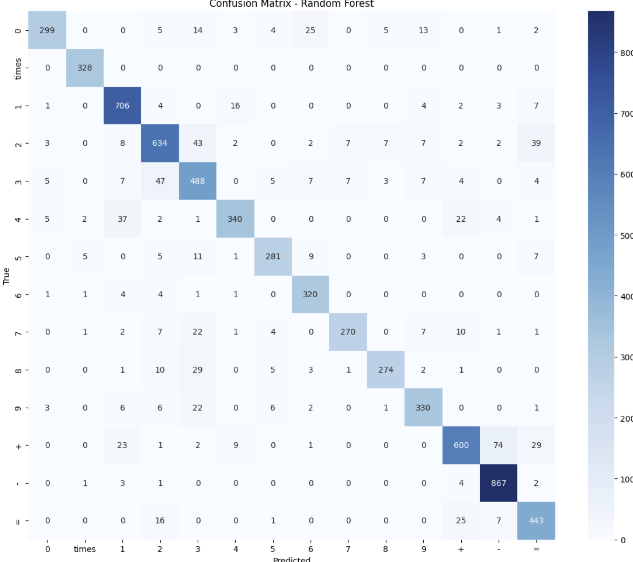

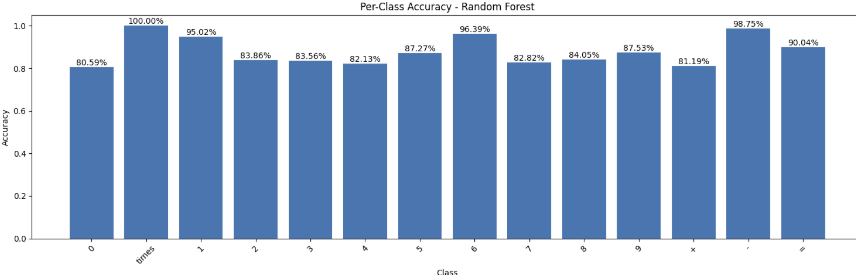

### Neural Networks

The neural network had an overall accuracy score of classification of 0.9860

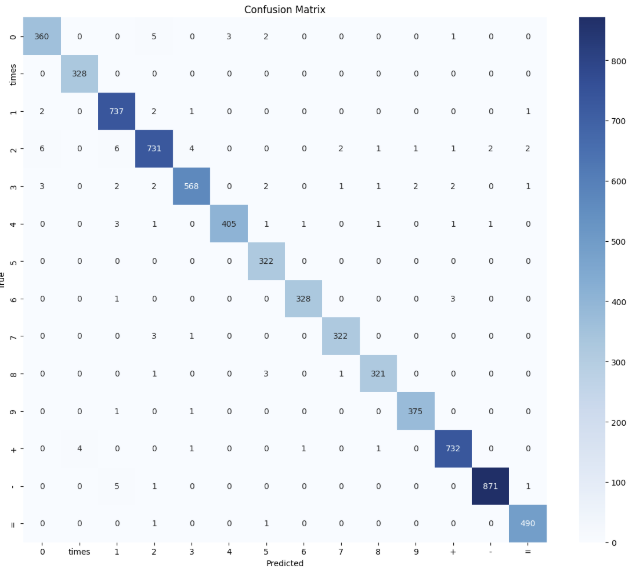

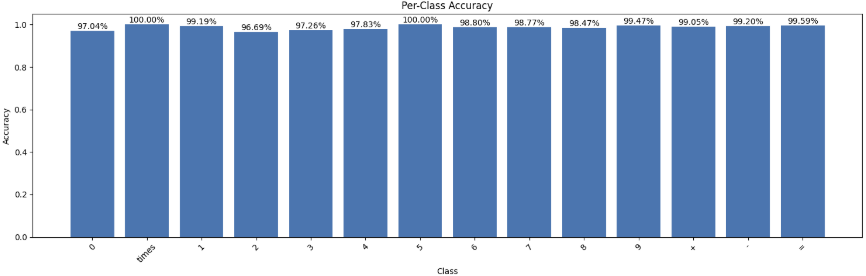

For the purpose of our classification, it is clear to see that, even after hyperparameter tuning, the neural network had the greatest accuracy score.

## Object Detection Task

Since the only algorithm that worked for object detection was the OpenCV Contour Detection, we only have the metrics to evaluate its performance.

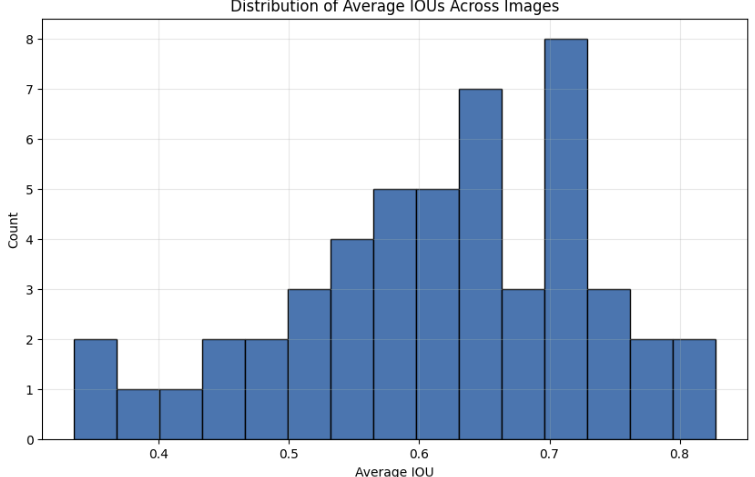

The average IOU is 0.6172, which at first glance seems low, but it must be stressed that this is because of how contour detection works fundamentally.

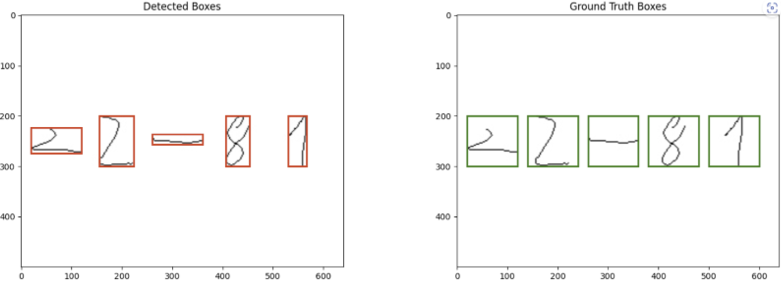

The ground truth of the bounding boxes is defined by the 45x45 image bounding box used to generate the image, and although Contour Detection still picks up the same objects. It picks up a smaller area of them (just around the symbol or number), reducing the IOU.

Bringing these two components together, we obtain our arithmetic equation solver. Once this was ran on all of the generated equations, we obtain an accuracy result of 47.00% (meaning it successfully solved 47% of the equations.)

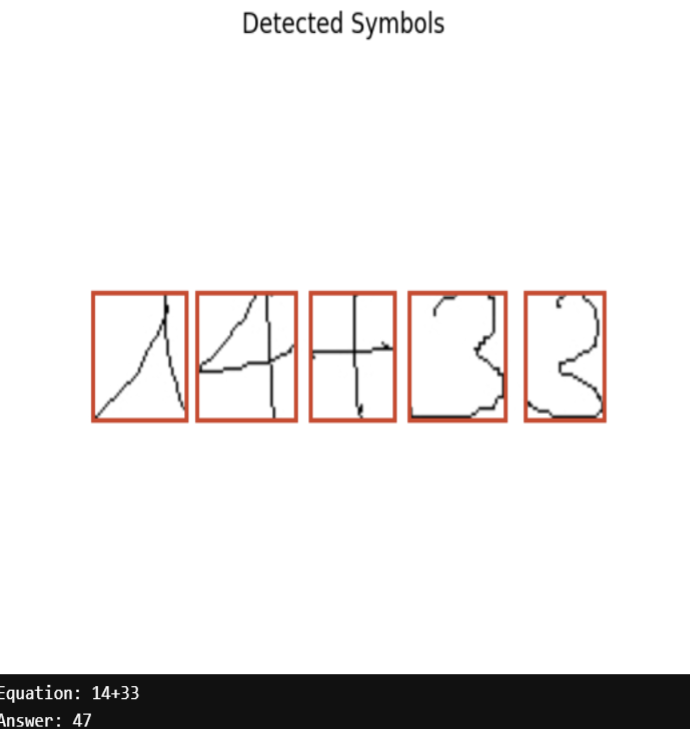

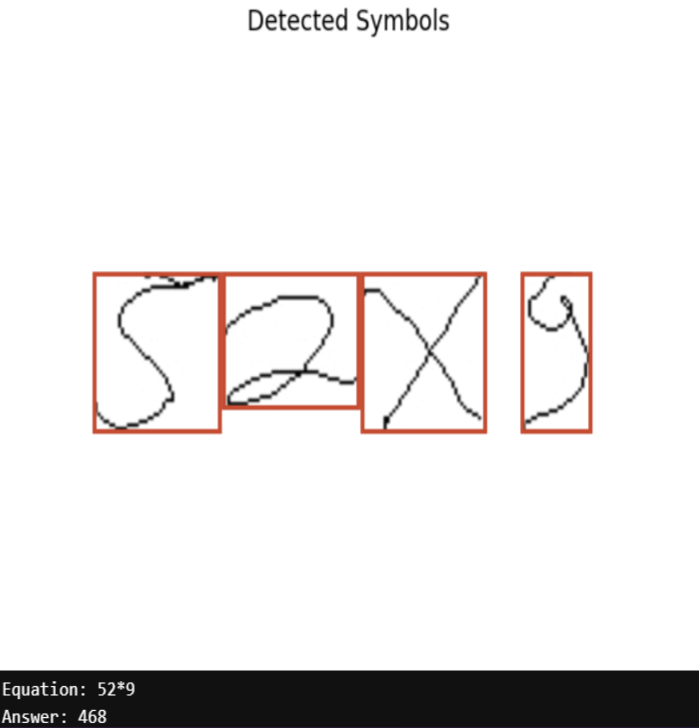

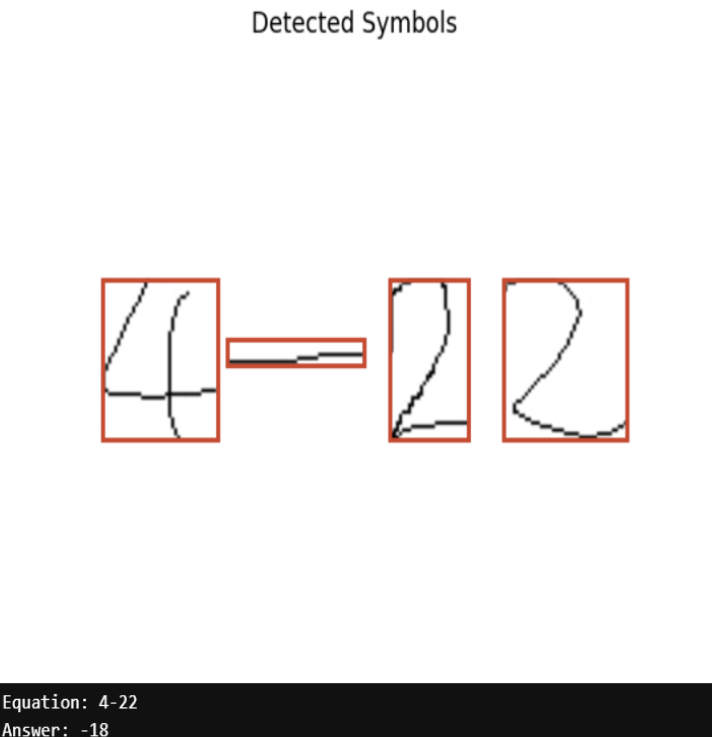

# Conclusions and Discussion

The classification process in our model demonstrated a high degree of accuracy, effectively identifying and categorizing the objects within the given classes. However, the primary challenge lay in the object detection component. Specifically, contour detection methods, while useful, exhibited sensitivity to noise in some cases, or alternately, fused multiple contours together, making precise object identification more difficult. This means that it will either detect every very small changes in pixel grayscale values or not detect enough and fuse bounding boxes that are close together. Some examples of this error can be seen as below

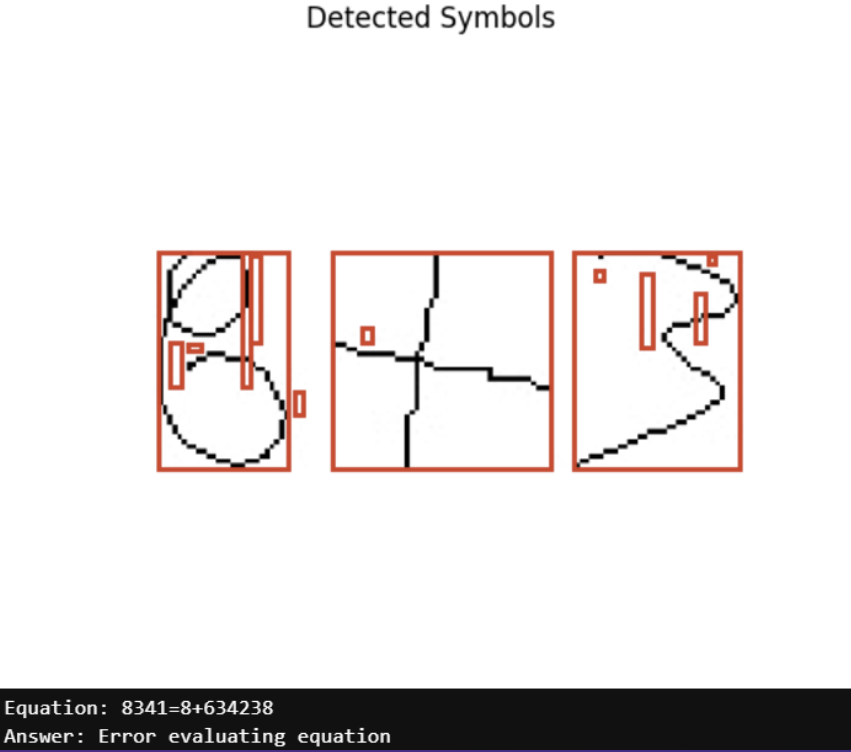

Using the YOLO algorithm could potentially address these issues and improve object detection accuracy, provided it is trained on our dataset. The YOLO algorithm for object detection is one that has been shown to be very accurate for most purposes. If we had been successful in training it for our dataset, it most likely would have been a better object detection algorithm than using contour detection, which is not even a deep learning model.

Currently, the system focuses on performing arithmetic calculations, but there is significant scope for expansion. By leveraging SymPy, a Python library for symbolic mathematics, more complex mathematical operations and functions could be implemented, extending the system's capabilities.

To further enhance the model's performance, especially in object detection, incorporating actual photographs for training and testing could provide a more realistic and diverse dataset. This would likely improve the model's generalizability and accuracy in practical scenarios.

# References

## References
1. https://github.com/tanchongmin/equation-solver/
2. ChatGPT for writing of report
3. https://docs.ultralytics.com/